# Парсинг страницы mediakit, необходимо получить данные работников портала: фио, город, должность, е-почту. 

## Цель
    Посчитать сколько фамилий сотрудников начинаются на каждую из букв русского алфавита (а - 10, б - 0 и т.д.)

## Импортируем библиотеки

In [1]:
from bs4 import BeautifulSoup
import requests

## Парсим страницы сайта

In [84]:
card_elements = []
URL = 'https://mediakit.iportal.ru/our-team/'
HEADERS = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"}

data = requests.get(URL, headers=HEADERS)
print(data.status_code)
soup = BeautifulSoup(data.text, 'html.parser')
data = soup.findAll('div', class_='t396')
data[4].text

# card_tags = []
# user_data = []
# cities = []
# emails = []
# all_data = []

# for data in all_cards:
#     card_tags.append(data.find_all_next('div', attrs={'class': 'tn-atom'}))

200


' \n\n    \nЕкатеринбург \nАртем Беседин \n    \n  \nГлавный редакторe1@iportal.ru \nНовосибирск \n    \n  \nИО главного редактораngs@iportal.ru \n    \nЕлена Гурьянова  '

Теперь поработаем с текстом

In [5]:
from natasha import (
    Segmenter,
    
    NewsEmbedding, 
    NewsMorphTagger,
    NewsSyntaxParser, 
    
    Doc
)

from natasha import NewsNERTagger

from razdel import tokenize

import re

In [6]:
segmenter = Segmenter() # сегментация

emb = NewsEmbedding() # встраиваю в функции
morph_tagger = NewsMorphTagger(emb) # морфология
syntax_parser = NewsSyntaxParser(emb) # синтаксис

In [172]:
# создаю текст
text = data[10].text

text = re.sub(r'([А-Я])', r' \1', text) # ставлю пробел между перед заглавной буквой
text = re.sub(r'([a-z])', r' \1', text) # ставлю пробел между перед english буквой
text = re.sub(r'([a-z])', r' \1', text) # ставлю пробел между перед english буквой
text = re.sub(r'|[\d]+', r'',text).strip()
# display(text)

doc = Doc(text) # создаю doc текста
# display(doc)

doc.segment(segmenter) # делю на сегменты
# display(doc)

doc.tag_morph(morph_tagger) # разбиваю на морфологию
# display(doc)

doc.parse_syntax(syntax_parser) # разбираю синтаксис
# display(doc)

# display(doc.sents) # рассматриваю инфу по тексту # [:5]
# display(doc.tokens) # рассматриваю инфу по токенам # [:5]

# display(doc.sents[0].morph.print()) # рассматриваем морфологию слов

# display(doc.sents[0].syntax.print()) # рассматриваем синтаксис слов

# display(doc.sents[0]..print())

In [173]:
ner_tagger = NewsNERTagger(emb) # извлечение именннованых сущностей, как видим у нас их нет так как они с мал буквы написаны 
doc.tag_ner(ner_tagger)

doc.ner.print()

Иркутск 
ORG──── 
 Екатерина  Шайтанова 
 PER───────────────── 
    
  
 Главный редактор  i  n  f  o@  c  h  i  t  a.  r  u 
 Чита 
 LOC─ 
    
  
    
 Зоя  Кузнецова 
 PER─────────── 
 Главный редактор  i  n  f  o@  i  r  c  i  t  y.  r  u


Извлечем имена и добавим их в список 

In [174]:
from natasha import (
    PER,
    NamesExtractor,
)

from natasha import MorphVocab

morph_vocab = MorphVocab()

names_extractor = NamesExtractor(morph_vocab)

for span in doc.spans: # приводим к нормальному виду именнованные сущности
    span.normalize(morph_vocab) 


for span in doc.spans:
    if span.type == PER:
        span.extract_fact(names_extractor)

name = [span.normal for span in doc.spans if span.type == PER ]

location=[]
for span in doc.spans:
    if span.type == 'LOC':
        location.append(span.normal)
        


print(location)
print(name)

['Чита']
['Екатерина  Шайтанова', 'Зоя  Кузнецова']


In [175]:
prof = []
for i in range(len(doc.tokens)):
    if doc.tokens[i].pos != 'PROPN' and doc.tokens[i].pos != 'X' and doc.tokens[i].pos != 'PUNCT':
        prof.append(doc.tokens[i].text)

 
prof = " ".join(prof)
prof

for i in range(len(prof)):
    if i != 0 and len(re.findall(r'[А-Я]', prof[i])) == 1:
        break_ = i
        break
break_   
prof[break_]
x = prof.split(prof[break_])
x

['', 'лавный редактор u ', 'лавный редактор']

In [176]:
mail = []
for i in range(len(doc.tokens)):
    if doc.tokens[i].pos == 'X' or doc.tokens[i].pos == 'PUNCT':
        mail.append(doc.tokens[i].text)
mail

mail = "".join(mail)

mail

mail.split('u', 1)

['info@chita.rinfo@ircity.r', '']

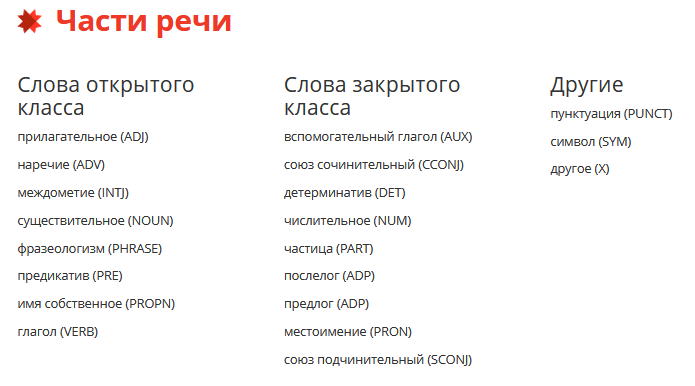

Далее я пытаюсь поделить cписок `all_data`, на списки, разделенные почтой работников. 

In [10]:
person_data = []
for i in all_data:
        if 'Москва' in i:
            person_data.append(all_data[0:all_data.index(i)+10])
        elif '.ru' in i:
            person_data.append(all_data[all_data.index(i)-1:all_data.index(i)+1])
            
print(person_data)

[]


Попытаюсь выделить город

In [11]:
for i in range(len(all_data)):
    cities.append(all_data[0])
    if '.ru' in all_data[i] and all_data[i+1] != '':
        cities.append(all_data[i+1])
cities = list(set(cities))

In [12]:
print(cities)

[]


Город выделить не получается...

In [13]:
df=pd.DataFrame()
df['emails'] = emails

df.head()

NameError: name 'pd' is not defined

**Вывод**

    Данный сайт является лендинговоой страничкой. Фио, город, должность, е-почта находится в одном контейнере. Спарсить по тегам не получается, можно выделить только весь текст(к тому же появляются ФИО, которых нет на сайте). 
    И уже по тексту выделять, НО там нет никакой закономерности!  